# SUPPORT VECTOR MACHINES
SVM can use for both Linear or nonLinear classification, regression, and even detection. SVM can be training with small and medium-sized nonlinear dataset (ie. hundreds thousands of instances), especially for the classification tasks. But, SVM does not scale very well to very large datasets.

Training dataset must be scaled before training with SVM model (ie. StandardScaler).
## 1. Linear SVM Classification
It is suitable for two classes classification. The SVM classifier includes *decision boundary, large margin classification*
### 1.1. Soft Margin Classification
If we strictly impose that all instances must be off the street and on the correct side, this is called ***hard margin classification***. But it has two main issues: First, only work fine if data is linearly separable. Second, it is sensitive to outliers.

To fix issues, finding a good balance between keeping the street as large as possible and limiting the *margin violations* (ie. instance end up in the middle of the street or even on wrong side). This is called ***soft margin classification***

The SVM model has to config some hyperparameters:
- Regularization `C`: if setting it is too low, the model is impossible to classify. `C` is too high to make the street larger, but it leads to more *margin violations*. Reducing C will result more instances on the street, so less risky to **Overfitting**. If we reduce too much, the model end up **Underfitting**. Which C=100, the model look like better.

If the model is overfitting, we can try to regularize it by reducing C.

Unlike the `Logistic Regression classifier`, `LinearSVC` doesn't have a `predict_proba()` method to estimate class probabilities. Using the `SVC` and set its `probability=True` to estimate the class probabilties.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
## Linear SVM classification
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


iris = load_iris(as_frame=True)
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = (iris.target == 2)

In [3]:
## load two classes 
# setosa_versicolor = (y == 0) | (y == 1)
# X = X[setosa_versicolor]
# y = y[setosa_versicolor]

In [4]:
## classifier model
svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, random_state=42))
                        
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [5]:
# predict iris verginica
svm_clf.predict([[5.5, 1.7], [5.5, 1.2]])

array([ True, False])

In [6]:
svm_clf.decision_function([[5.5, 1.7], [5.5, 1.2]])

array([ 0.66163411, -0.46198826])

In [7]:
svm_clf.classes_

array([False,  True])

In [8]:
svm_clf.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('linearsvc', LinearSVC(C=1, random_state=42))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'linearsvc': LinearSVC(C=1, random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'linearsvc__C': 1,
 'linearsvc__class_weight': None,
 'linearsvc__dual': True,
 'linearsvc__fit_intercept': True,
 'linearsvc__intercept_scaling': 1,
 'linearsvc__loss': 'squared_hinge',
 'linearsvc__max_iter': 1000,
 'linearsvc__multi_class': 'ovr',
 'linearsvc__penalty': 'l2',
 'linearsvc__random_state': 42,
 'linearsvc__tol': 0.0001,
 'linearsvc__verbose': 0}

##### Different hyperparameter C=1 and C=100 to the narrow of the margin

In [9]:
## define 2 models
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, max_iter=10_000, random_state=42)
svm_clf2 = LinearSVC(C=100, max_iter=10_000, random_state=42)

svm_pipe1 = make_pipeline(scaler, svm_clf1)
svm_pipe2 = make_pipeline(scaler, svm_clf2)

## train models
svm_pipe1.fit(X, y)
svm_pipe2.fit(X, y)

## convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
## get the margins
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_

svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

## find a support vectors (LinearSVC does not do this automatically)
t = y * 2 -1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

In [10]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    ## at the decision boundary, x0w0 + x1w1 + b = 0
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1] # find x1
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_
    
    plt.plot(x0, decision_boundary, 'k-', linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, 'k--', zorder=-2)
    plt.plot(x0, gutter_down, 'k--', zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolor='#AAA', zorder=-1)

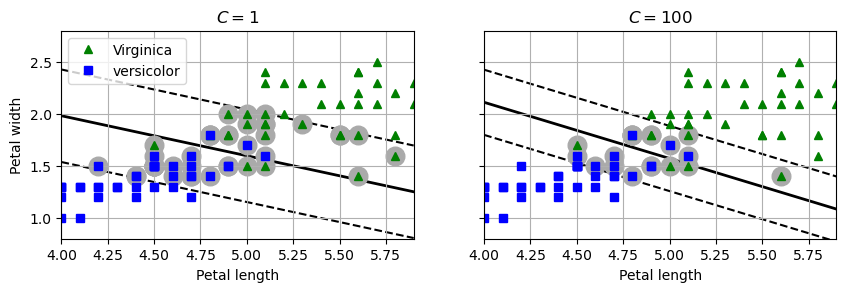

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'g^', label='Virginica')
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'bs', label='versicolor')
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend(loc='upper left')
plt.title(f'$C= {svm_clf1.C}$')
plt.grid()
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'g^')
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'bs')
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel('Petal length')
plt.grid()
plt.title(f'$C= {svm_clf2.C}$')
plt.axis([4, 5.9, 0.8, 2.8])

plt.show()

When the hyperparameter C is low (C=1), the margin is wide, that leads to more margin violations, and less risk to overfitting. But if we reduce C to much, then the model end up to underfitting. When C=100, the model looks like to generalize better than C=1.
## 2. NonLinear SVM Classification
The data is almost onlinear distribution. To implement this idea, we use the dataset `make_moons`, this is the dataset for binary classification. And using the `PolynomialFeatures` transformer.

In [12]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
poly_svm_clf = make_pipeline(PolynomialFeatures(degree=3),
                             StandardScaler(),
                             LinearSVC(C=10, max_iter=10_000, random_state=42))
poly_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

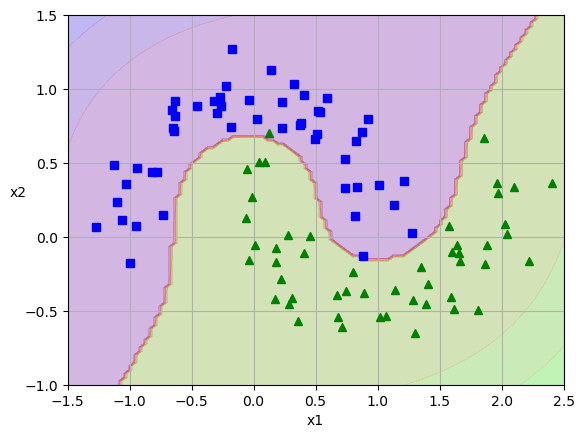

In [13]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'g^')
    plt.axis(axes)
    plt.grid()
    plt.xlabel('x1')
    plt.ylabel('x2', rotation=0)
    
def plot_prediction(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    
plot_prediction(poly_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

### 2.1. Polynomial Kernel
The low polynomial degree can't deal with very complex datasets, and with high polynomial degree it creates a huge number of features, making the model too slow.

SVMs alow to apply a mathematical technique called the *kernel trick*. The kernel trick will output the same result as we had added many polynomial features, even with a very high-degree. The trick is implemented by the SVC class.

In [14]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel='poly', degree=3, coef0=1, C=5))  
# coef0 controls how much the model is influenced by high-degree term versus low-degree term
poly_kernel_svm_clf.fit(X, y)                                    

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

In [15]:
# another model with coef0=100
poly100_kernel_svm_clf = make_pipeline(StandardScaler(),
                                       SVC(kernel='poly', degree=10, coef0=100, C=5))
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

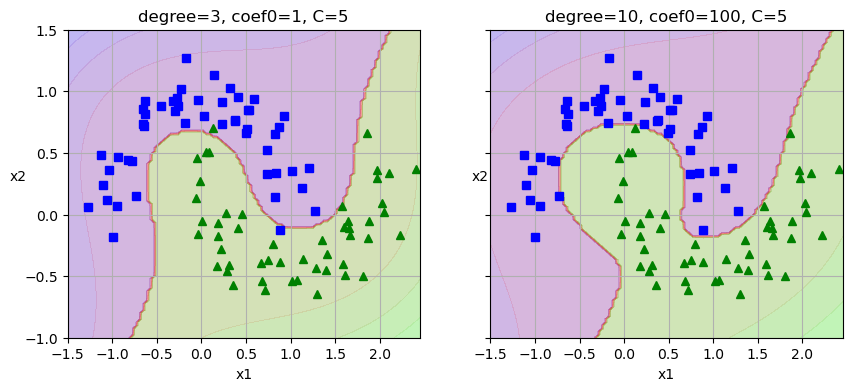

In [16]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_prediction(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
plt.title('degree=3, coef0=1, C=5')

plt.sca(axes[1])
plot_prediction(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
plt.title('degree=10, coef0=100, C=5')
plt.show()

### 2.2. Similarity Features
Another technique to tackle nonlinear problems is to add features computed using similarity function, which measures how much each instance resembles a particular *landmark*, when we added the geographic similarity features. That means, we are going to map the data features to new positions by using a transform function (ie. Gaussian RBF) that the transformed training data will be linearly separable.
### 2.3. Gaussian RBF Kernel
This is a kernel trick function and working similar to Polynomial feature method. It is also the similarity features method, but it may be computationally expensive to compute all the additional features, especially on large training set.

The Gaussian RBF is used with the `SVC` class, the hyperparameter $\gamma$ and C. Inscreasing *gamma* makes the bell-shaped curve narrower: each instance's range of influence is smaller, the decision boundary ends up being more irregualar. Whereas, the small *gamma* value makes the bell-shaped curve wider: instances have a large range of influence, and the decision boundary ends up smoother. So, the $\gamma$ acts like a regularization hyperparameter: If the model is overfitting, we should reduce *gamma*, otherwise, if it is underfitting, increasing *gamma* (similar to C).  

Other kernels are rarely used. *String kernel* for text classification or DNA sequences.

In [17]:
rbf_kernel_clf = make_pipeline(StandardScaler(),
                               SVC(kernel='rbf', gamma=5, C=0.001))
rbf_kernel_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

In [18]:
rbf_kernel_clf.predict([[5.5, 1.7], [5.5, 1.2]])

array([1, 1])

In [19]:
rbf_kernel_clf.classes_

array([0, 1])

In [20]:
rbf_kernel_clf.decision_function([[5.5, 1.7], [5.5, 1.2]])

array([0.00091297, 0.00091297])

In [21]:
## different plots gamma and C
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)
type(hyperparams)

tuple

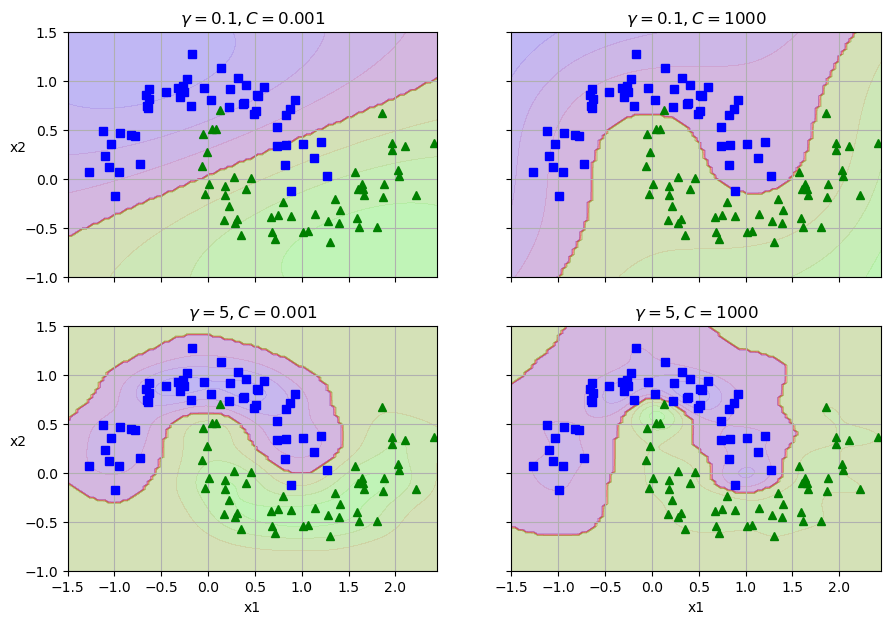

In [22]:
svm_clfs = list()
for gamma, C in hyperparams:
    rbf_kernel_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel='rbf', gamma=gamma, C=C))
    rbf_kernel_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_clf)
    
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_prediction(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(f'$\gamma= {gamma}, C= {C}$')
    if i in (0, 1):
        plt.xlabel('')
    if i in (1, 3):
        plt.ylabel('')
        
plt.show()

### 2.4. SVM Calsses and Computational Complexity
The LinearSVC implements the optimized algorithm for linear SVMs, and it doesn't support any kernel tricks. Its algorithm complexity is controlled by the *tolerance hyperparameter* $\epsilon$ (`tol=` parameter)

The SVC class has supported the kernel tricks, the train complexity is (m^2 =n) to (m^3 + n).

The SGDClassifier class also performs large-margin classification and its hyperparameter can be adjusted to produce similar result as the linear SVMs (*alpha and penalty*) and the *learning-rate*.
## 3. SVM Regression
Using the SVMs for Regression. Instead of fitting the largest possible street between two classes while limiting margin violation, SVM Regression tries to fit as many instances as possible on the street while limiting the margin violations(ie. instances off the street). The width of the street is controlled by hyperparameter $\epsilon$

In [24]:
## use SV Regression class
from sklearn.svm import LinearSVR

np.random.seed(42)
X = 2 * np.random.rand(50, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(50)  # Gaussian bias

svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=0.5, random_state=42))
svm_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.5, random_state=42))])

In [29]:
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    epsilon = svm_reg[-1].epsilon
    off_margin = np.abs(y - y_pred) >= epsilon
    return np.argwhere(off_margin)

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    epsilon = svm_reg[-1].epsilon
    plt.plot(x1s, y_pred, 'k-', label=r'$\hat{y}$', zorder=-2)
    plt.plot(x1s, y_pred + epsilon, 'k--', zorder=-2)
    plt.plot(x1s, y_pred - epsilon, 'k--', zorder=-2)
    plt.scatter(X[svm_reg._support], y[svm_reg._support], s=180, facecolor="#AAA", zorder=-1)
    plt.plot(X, y, 'bo')
    plt.xlabel('x1')
    plt.legend()
    plt.axis(axes)

In [30]:
svm_reg2 = make_pipeline(StandardScaler(),
                         LinearSVR(epsilon=1.2, random_state=42))
svm_reg2.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=1.2, random_state=42))])

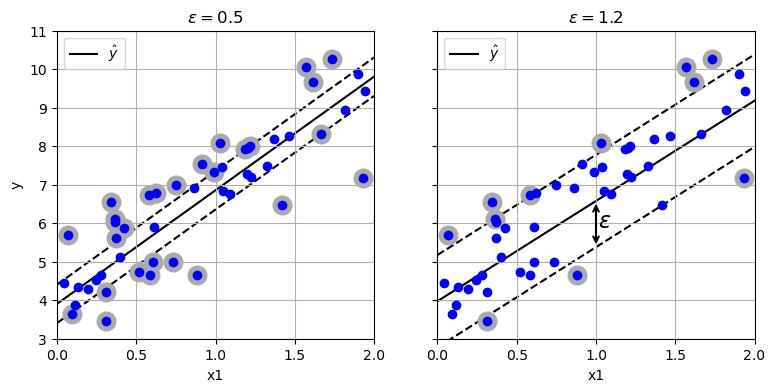

In [35]:
svm_reg._support = find_support_vectors(svm_reg, X, y)
svm_reg2._support = find_support_vectors(svm_reg2, X, y)
eps_x1 = 1
eps_y_pred = svm_reg2.predict([[eps_x1]])

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg, X, y, [0, 2, 3, 11])
plt.title(f'$\epsilon = {svm_reg[-1].epsilon}$')
plt.ylabel('y')
plt.grid()
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(f'$\epsilon = {svm_reg2[-1].epsilon}$')
plt.annotate('', 
             xy=(eps_x1, eps_y_pred), 
             xycoords='data', 
             xytext=(eps_x1, eps_y_pred - svm_reg2[-1].epsilon),
             textcoords='data', 
             arrowprops={'arrowstyle': '<->', 'linewidth': 1.5})
plt.text(1.01, 5.9, r'$\epsilon$', fontsize=16)
plt.grid()
plt.show()

Reduce $\epsilon$ to increase the number of support vectors. If we add more training instances within the margin, it will not effect the model's predictions.

For nonlinear regression tasks, we can use kernelized SVM model. Some regularization configured for model like *degree, C, epsilon*

In [36]:
from sklearn.svm import SVR

np.random.seed(42)
X = 2 * np.random.rand(50, 1) -1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0]**2 + np.random.randn(50)/10

svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel='poly', degree=2, C=0.01, epsilon=0.1))
svm_poly_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])

In [37]:
svm_poly_reg2 = make_pipeline(StandardScaler(),
                              SVR(kernel='poly', degree=2, C=100))
svm_poly_reg2.fit(X, y)

svm_poly_reg._support = find_support_vectors(svm_poly_reg, X, y)
svm_poly_reg2._support = find_support_vectors(svm_poly_reg2, X, y)

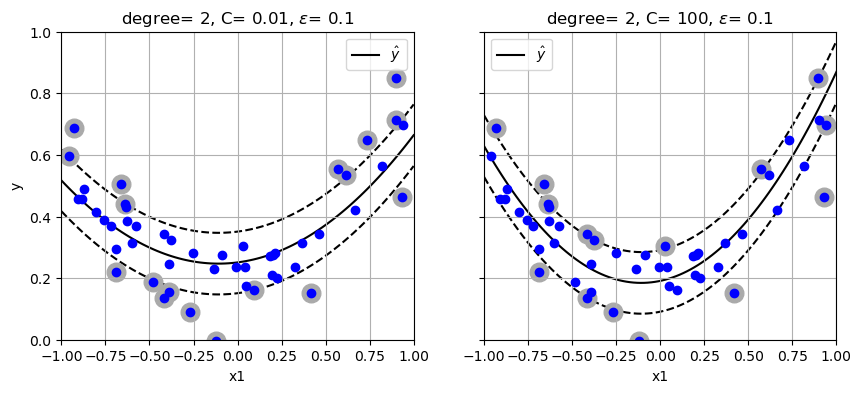

In [38]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg, X, y, [-1, 1, 0, 1])
plt.title(f'degree= {svm_poly_reg[-1].degree}, C= {svm_poly_reg[-1].C}, $\epsilon$= {svm_poly_reg[-1].epsilon}')
plt.ylabel('y')
plt.grid()

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(f'degree= {svm_poly_reg2[-1].degree}, C= {svm_poly_reg2[-1].C}, $\epsilon$= {svm_poly_reg2[-1].epsilon}')
plt.grid()
plt.show()

## Exercises
1. fundamental idea of SVM: the goal to have the largest margin between the decision boundary that separate the two classes. 
2. After training SVM, a support vector is any instance located on the street, including its border. The decision boundary is determined by support vectors. Any instance that is not a support vector (ie. is off the street) has no influence to the decision boundary, we could remove them. 
3. If training set is not scaled, the SVM will tend to neglect small features.
4. SVM outputs confidence score? We use the decision_function() method to get the confidence scores (the score is a distance between instance and decision boundary). If we want to get the probability, we set `probability=True` when create the SVC, then we can use `predict_proba()` and `predict_log_proba()` methods.
5. How we choose the LinearSVC, SVC, SGDClassifier? All three classes can be used for the large-margin linear classification. SVC support kernel trick, but not scale well to dataset with many instances. It doesn't scale well to a large number of features. LinearSVC class implement optimized algorithm for Linear SVMs. While SGDClassifier is more flexiable, and supports incremental learning. 
6. SVM with `kernel='rbg'` is underfitting, there might be too much regularization, to decrease it, we much increase `gamma` or `C` (or both).
7. What does it mean for a model to be $\epsilon$ -sensitive? A Regression SVM model tries to fit as many instances with a small margin around its predictions. If we add instances within this margin, the model is not effected at all, it is said to be `epsilon-sensitive`.
8. Kernel trick is mathematical technique to map the inputs to another space using a nonlinear transformation, then training a linear SVM on the outputs of resulting high-dimensional space. The kernel trick gives the same result without having to tranform the input at all.